In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [16]:
os.listdir('Sales_Data')

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'all_data.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [17]:
files= [file for file in os.listdir('Sales_Data')]
for file in files:
    print(file)

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
all_data.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [18]:
path='Sales_Data'
all_data=pd.DataFrame()

for file in files:
    current_df=pd.read_csv(path+"/"+file)
    all_data=pd.concat([all_data,current_df])
    
all_data.shape

(934250, 6)

In [19]:
all_data.to_csv('Sales_Data/all_data.csv',index=False)

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [21]:
all_data.isnull().sum()

Order ID            2725
Product             2725
Quantity Ordered    2725
Price Each          2725
Order Date          2725
Purchase Address    2725
dtype: int64

In [22]:
all_data=all_data.dropna(how='all')
all_data.shape

(931525, 6)

In [23]:
'12/30/19 00:01'.split('/')[0]

'12'

In [24]:
def month(x):
    return x.split('/')[0]

In [25]:
all_data['month']=all_data['Order Date'].apply(month)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [26]:
### What is the best month for sale
### sales=Quantity ordered*Price each

In [27]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [28]:
all_data['month']=all_data['month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [29]:
all_data['month'].unique()

array(['12', 'Order Date', '01', '04', '05', '02', '03', '08', '09', '06',
       '11', '10', '07'], dtype=object)

In [30]:
filter=all_data['month']=='Order Date'

In [31]:
all_data=all_data[~filter]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [32]:
all_data['month']=all_data['month'].astype(int)

In [33]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int64
dtype: object

In [34]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data['Price Each']=all_data['Price Each'].astype(float)

In [35]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
dtype: object

In [36]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [37]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [38]:
all_data.groupby('month')['sales'].sum()

month
1      9111283.65
2     11010112.10
3     14035501.90
4     16953351.20
5     15763033.75
6     12889011.30
7     13238878.80
8     11222339.40
9     10487800.65
10    18683634.40
11    15998016.00
12    23067216.70
Name: sales, dtype: float64

Text(0, 0.5, 'sales in USD')

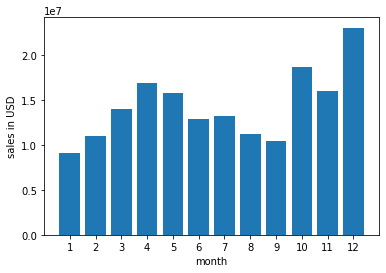

In [39]:
months=range(1,13)
plt.bar(months,all_data.groupby('month')['sales'].sum())
plt.xticks(months)
plt.xlabel('month')
plt.ylabel('sales in USD')

In [40]:
#### which city has max order

In [41]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [ ]:
### we have to fetch 'city' from Purchase Address

In [42]:
'136 Church St, New York City, NY 10001'.split(',')

['136 Church St', ' New York City', ' NY 10001']

In [ ]:
'136 Church St, New York City, NY 10001'.split(',')[1]

In [43]:
def city(x):
    return x.split(',')[1]

In [44]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [45]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [46]:
all_data.groupby('city')['city'].count()

city
 Atlanta           74405
 Austin            49525
 Boston            99670
 Dallas            74100
 Los Angeles      148025
 New York City    124380
 Portland          62325
 San Francisco    223660
 Seattle           73660
Name: city, dtype: int64

<AxesSubplot:xlabel='city'>

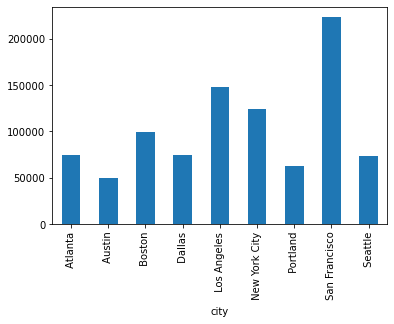

In [47]:
all_data.groupby('city')['city'].count().plot.bar()

In [ ]:
#### At what time sales of product purchase is max?

In [ ]:
### fetch hour from "Order DAte"

In [48]:
all_data['Order Date'].dtypes

dtype('O')

In [49]:
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour

In [54]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [55]:
keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))


In [56]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [57]:
hour

[19550,
 11750,
 6215,
 4155,
 4270,
 6605,
 12410,
 20055,
 31280,
 43740,
 54720,
 62055,
 62935,
 60645,
 54920,
 50875,
 51920,
 54495,
 61400,
 64525,
 61140,
 54605,
 44110,
 31375]

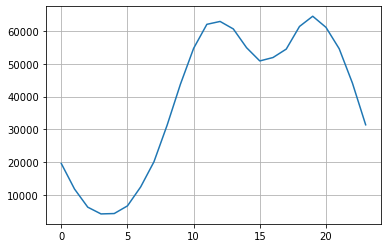

In [58]:
plt.grid()
plt.plot(keys,hour)

In [ ]:
#### What product sold most and why?
#### What products are most often sold together?

In [59]:
all_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   20645
27in 4K Gaming Monitor         31220
27in FHD Monitor               37750
34in Ultrawide Monitor         30995
AA Batteries (4-pack)         138175
AAA Batteries (4-pack)        155085
Apple Airpods Headphones       78305
Bose SoundSport Headphones     67285
Flatscreen TV                  24095
Google Phone                   27660
LG Dryer                        3230
LG Washing Machine              3330
Lightning Charging Cable      116085
Macbook Pro Laptop             23640
ThinkPad Laptop                20650
USB-C Charging Cable          119875
Vareebadd Phone                10340
Wired Headphones              102785
iPhone                         34245
Name: Quantity Ordered, dtype: int64

<AxesSubplot:xlabel='Product'>

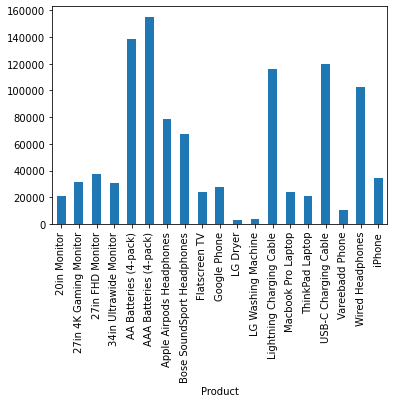

In [60]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [61]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [62]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

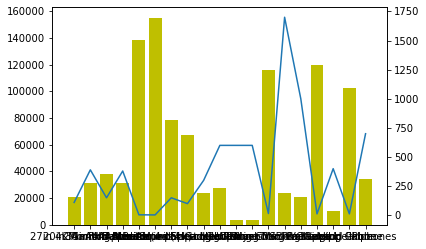

In [63]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='y')
ax2.plot(products,prices)

/var/folders/81/hc4rlcjs5m97l6k4c7dq83n80000gn/T/ipykernel_86427/3675690275.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

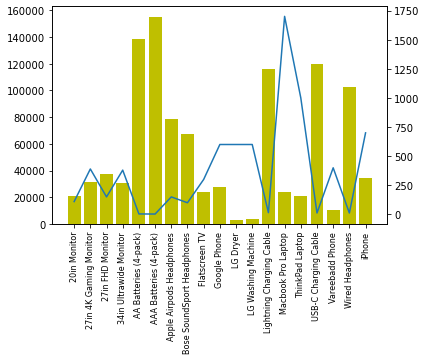

In [64]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='y')
ax2.plot(products,prices)
ax1.set_xticklabels(products,rotation='vertical',size=8)

In [ ]:
#### answer 2
### to find this we have to focus on the product which have same order_id

In [65]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [66]:
df=all_data['Order ID'].duplicated(keep='first')
df

0        False
1        False
2        False
3        False
4        False
         ...  
13617     True
13618     True
13619     True
13620     True
13621     True
Name: Order ID, Length: 929750, dtype: bool

In [67]:
df2=all_data[df]

In [68]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12
37,295698,USB-C Charging Cable,2,11.95,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,23.90,New York City,14
43,295703,Bose SoundSport Headphones,1,99.99,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin,12


In [69]:
df2['Grouped']=df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

/var/folders/81/hc4rlcjs5m97l6k4c7dq83n80000gn/T/ipykernel_86427/3752372846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped']=df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [70]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Grouped
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,"USB-C Charging Cable,Bose SoundSport Headphone..."
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12,"USB-C Charging Cable,Bose SoundSport Headphone..."
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12,"USB-C Charging Cable,Bose SoundSport Headphone..."
37,295698,USB-C Charging Cable,2,11.95,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,23.90,New York City,14,"USB-C Charging Cable,Vareebadd Phone,USB-C Cha..."
43,295703,Bose SoundSport Headphones,1,99.99,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin,12,"Bose SoundSport Headphones,AA Batteries (4-pac..."


In [71]:
df2=df2.drop_duplicates(subset=['Order ID'])

In [72]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Grouped
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,"USB-C Charging Cable,Bose SoundSport Headphone..."
37,295698,USB-C Charging Cable,2,11.95,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,23.90,New York City,14,"USB-C Charging Cable,Vareebadd Phone,USB-C Cha..."
43,295703,Bose SoundSport Headphones,1,99.99,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin,12,"Bose SoundSport Headphones,AA Batteries (4-pac..."
67,295726,Lightning Charging Cable,1,14.95,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston,14,"Lightning Charging Cable,iPhone,Lightning Char..."
77,295735,Apple Airpods Headphones,1,150.00,12/22/19 18:25,"374 Lincoln St, New York City, NY 10001",12,150.00,New York City,18,"Apple Airpods Headphones,Wired Headphones,iPho..."


In [73]:
df2['Grouped'].value_counts()

Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable                                                                                                                                                                                                                                                                               19831
AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack)                                                                                                                                                                                                                                                                                       19826
AA Batteries (4-pack),AA Batteries (4-pack),AA Batteries (4-pack),AA Batteries (4-pack)                                                                                                                                                                 

In [74]:
df2['Grouped'].value_counts()[0:5]

Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable    19831
AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack)            19826
AA Batteries (4-pack),AA Batteries (4-pack),AA Batteries (4-pack),AA Batteries (4-pack)                19809
USB-C Charging Cable,USB-C Charging Cable,USB-C Charging Cable,USB-C Charging Cable                    19792
Wired Headphones,Wired Headphones,Wired Headphones,Wired Headphones                                    17208
Name: Grouped, dtype: int64

<AxesSubplot:ylabel='Grouped'>

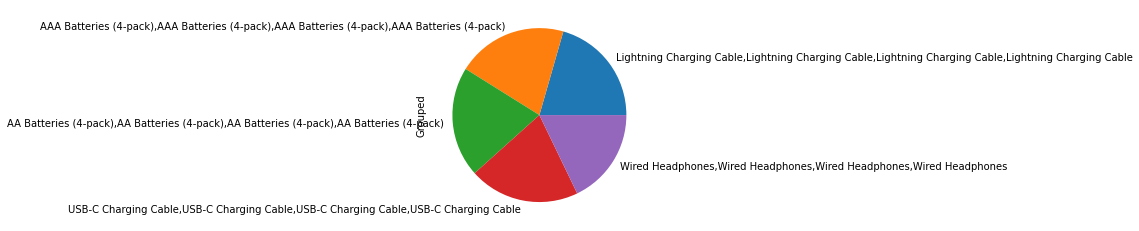

In [75]:
df2['Grouped'].value_counts()[0:5].plot.pie()